# Model Training

# 1. Libraries and Dataset

## 1.1. Importing the libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1.2. Importing Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# columns = []
# for col in list(df.columns):
#     columns.append(col.replace(" ", "_").replace("/", "_"))

# df.columns = columns
# df.head()

In [ ]:
# df.columns = [col.replace(" ", "_").replace("/", "_") for col in df.columns]
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1.3. Preparing Indepnedent (X) and Dependent (Y) Features

In [8]:
X = df.drop(columns = ['math_score'])
y = df['math_score']
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


### 1.3.1. Feature Engineering

In [9]:
cat_features = [col for col in X.columns if X[col].dtypes == 'O']
num_features = [col for col in X.columns if X[col].dtypes != 'O']

#cat_features = X.select_dtypes(include='object').columns
# num_features = X.select_dtypes(exclude='object').columns

print(cat_features)
print(num_features)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
['reading_score', 'writing_score']


In [10]:
# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('StandardScaler', numeric_transformer, num_features),
#         ('OneHotEncoder', oh_transformer, cat_features)
#     ]
# )

# X = preprocessor.fit_transform(X)
# X.shape

In [11]:
transformers = [
    ('scaler', StandardScaler(), num_features),
    ('onehot', OneHotEncoder(), cat_features)
]

preprocessor = ColumnTransformer(transformers)

X = preprocessor.fit_transform(X)

X.shape

(1000, 19)

### 1.3.2 Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## An Evaluation Fucntion to provide different metrics

In [19]:
def evaluate_model(true, predicted):
    
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)

    return mae, mse, rmse, r2

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'XGB Regressor': XGBRegressor()
}

model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Lasso Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Decision Tree Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNeighbors Regressor': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'AdaBoost Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Support Vector Regressor': {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'CatBoost Regressor': {'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGB Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
}
results = []

for name, regressor in models.items():
    print(f"Training {name}...")

    grid = GridSearchCV(
        estimator= regressor,
        param_grid = model_params[name],
        cv = 5,
        n_jobs = -1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_param = grid.best_params_

    mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, best_model.predict(X_train))
    mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, best_model.predict(X_test))

    results.append({
        'Model': name,
        'Best Params': best_param,
        'Mean Abs Error (train)': mae_train,
        'Mean Abs Error (test)': mae_test,
        'Mean Squared Error (train)': mse_train,
        'Mean Squared Error (test)': mse_test,
        'Root Mean Squared Error (train)': rmse_train,
        'Root Mean Squared Error (test)': rmse_test,
        'R2 Score (train)': r2_train,
        'R2 Score (test)': r2_test
    })

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree Regressor...
Training KNeighbors Regressor...
Training Random Forest Regressor...
Training AdaBoost Regressor...
Training Support Vector Regressor...
Training CatBoost Regressor...
Training XGB Regressor...


In [15]:
results_df = pd.DataFrame(results).sort_values(by= 'R2 Score (test)', ascending= False)
results_df

,Model,Best Params,Mean Abs Error (train),Mean Abs Error (test),Mean Squared Error (train),Mean Squared Error (test),Root Mean Squared Error (train),Root Mean Squared Error (test),R2 Score (train),R2 Score (test)
2,Lasso Regression,{'alpha': 0.1},4.334891,4.154561,29.143716,28.821024,5.398492,5.368522,0.870729,0.881560
1,Ridge Regression,{'alpha': 0.9},4.265135,4.211394,28.337248,29.059700,5.323274,5.390705,0.874307,0.880579
0,Linear Regression,{},4.266712,4.214763,28.334870,29.095170,5.323051,5.393994,0.874317,0.880433
8,CatBoost Regressor,{'depth': 3},3.508838,4.345087,19.179769,30.615650,4.379471,5.533141,0.914926,0.874185
5,Random Forest Regressor,{'max_depth': 7},3.385143,4.512418,17.457833,33.867873,4.178257,5.819611,0.922564,0.860820
9,XGB Regressor,{'learning_rate': 0.1},2.046711,4.710447,7.193333,37.412216,2.682039,6.116553,0.968093,0.846254
6,AdaBoost Regressor,{'learning_rate': 1.0},4.702199,4.780224,33.274014,38.067338,5.768363,6.169873,0.852409,0.843562
3,Decision Tree Regressor,{'max_depth': 5},4.639612,4.931523,32.687389,42.771610,5.717289,6.540001,0.855011,0.824230
4,KNeighbors Regressor,{'n_neighbors': 10},4.835000,5.506000,36.602375,50.652200,6.049990,7.117036,0.837646,0.791845
7,Support Vector Regressor,{'C': 1.0},4.869189,5.401539,43.257024,66.042005,6.577007,8.126623,0.808128,0.728600


## Rough

In [133]:
model = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'XGB Regressor': XGBRegressor()
}

model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Lasso Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Decision Tree Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNeighbors Regressor': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'AdaBoost Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Support Vector Regressor': {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'CatBoost Regressor': {'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGB Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_mae = float('inf')

for model_name, model in model.items():
    params = model_params.get(model_name, {})
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R2 Score: {r2}")
    print()

    if mae < best_mae:
        best_mae = mae
        best_model = model_name

print(f"Best Model: {best_model}")
print(f"Best MAE: {best_mae}")

# Save the best model
joblib.dump(best_model, 'best_model.joblib')

# Load the best model
best_model = joblib.load('best_model.joblib')

y_pred = best_model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

print(f"Best Model: {best_model}")  
print(f"Best MAE: {mae}")
print(f"Best MSE: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best R2 Score: {r2}")

print("Best Model has been saved to 'best_model.joblib'")



Linear Regression MAE: 4.214763142474851
Linear Regression MSE: 29.095169866715487
Linear Regression RMSE: 5.393993869732843
Linear Regression R2 Score: 0.8804332983749565

Ridge Regression MAE: 4.211100688014259
Ridge Regression MSE: 29.056272192348278
Ridge Regression RMSE: 5.390387016935637
Ridge Regression R2 Score: 0.8805931485028738

Lasso Regression MAE: 4.154561433695068
Lasso Regression MSE: 28.82102358487772
Lasso Regression RMSE: 5.368521545535392
Lasso Regression R2 Score: 0.8815599034723755

Decision Tree Regressor MAE: 4.931523210662771
Decision Tree Regressor MSE: 42.77161032657878
Decision Tree Regressor RMSE: 6.540000789493743
Decision Tree Regressor R2 Score: 0.8242299188020519

KNeighbors Regressor MAE: 5.505999999999999
KNeighbors Regressor MSE: 50.65219999999999
KNeighbors Regressor RMSE: 7.117035899867303
KNeighbors Regressor R2 Score: 0.7918446081670628

Random Forest Regressor MAE: 4.542993135629872
Random Forest Regressor MSE: 33.660687417182274
Random Forest R

AttributeError: 'str' object has no attribute 'predict'

In [147]:
model = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'XGB Regressor': XGBRegressor()
}

model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Lasso Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Decision Tree Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNeighbors Regressor': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'AdaBoost Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Support Vector Regressor': {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'CatBoost Regressor': {'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGB Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
}


# Store the results
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Loop over all models
for name, reg in model.items():
    print(f"Training {name}...")

    # Create GridSearchCV
    grid = GridSearchCV(estimator=reg,
                        param_grid=model_params[name],
                        cv=5,
                        scoring='r2',
                        n_jobs=-1)
    
    # Fit the model
    grid.fit(X_train, y_train)

    # Best model and R² on training data
    best_model = grid.best_estimator_
    y_pred = grid.best_estimator_.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

    # Save the result
    results.append({
        'Model': name,
        'Best Params (test)': grid.best_params_,
        'Mean Abs Error (test)': mae,
        'Mean Squared Error (test)': mse,
        'Root Mean Squared Error (test)': rmse,
        'R2 Score (test)': r2

    })

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).sort_values(by='R2 Score (test)', ascending=False)
print(results_df)


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree Regressor...
Training KNeighbors Regressor...
Training Random Forest Regressor...
Training AdaBoost Regressor...
Training Support Vector Regressor...
Training CatBoost Regressor...
Training XGB Regressor...
                      Model      Best Params (test)  Mean Abs Error (test)  \
0         Linear Regression                      {}               4.227591   
1          Ridge Regression          {'alpha': 1.0}               4.226224   
2          Lasso Regression          {'alpha': 0.1}               4.226376   
8        CatBoost Regressor            {'depth': 2}               4.211778   
5   Random Forest Regressor        {'max_depth': 7}               4.429356   
9             XGB Regressor  {'learning_rate': 0.1}               4.580212   
6        AdaBoost Regressor  {'learning_rate': 0.9}               4.991439   
4      KNeighbors Regressor      {'n_neighbors': 8}       

In [148]:
results_df

,Model,Best Params (test),Mean Abs Error (test),Mean Squared Error (test),Root Mean Squared Error (test),R2 Score (test)
0,Linear Regression,{},4.227591,27.872857,5.279475,0.887141
1,Ridge Regression,{'alpha': 1.0},4.226224,27.888960,5.281000,0.887075
2,Lasso Regression,{'alpha': 0.1},4.226376,28.055116,5.296708,0.886403
8,CatBoost Regressor,{'depth': 2},4.211778,28.898532,5.375735,0.882987
5,Random Forest Regressor,{'max_depth': 7},4.429356,30.358089,5.509817,0.877078
9,XGB Regressor,{'learning_rate': 0.1},4.580212,34.093246,5.838942,0.861954
6,AdaBoost Regressor,{'learning_rate': 0.9},4.991439,37.666922,6.137338,0.847484
4,KNeighbors Regressor,{'n_neighbors': 8},5.345000,42.906094,6.550274,0.826270
3,Decision Tree Regressor,{'max_depth': 5},5.462466,44.751607,6.689664,0.818797
7,Support Vector Regressor,{'C': 1.0},5.429865,51.799133,7.197161,0.790261


### Multiple Model GridSearchCV

#### Dependent and Independent Variables

In [3]:
X = df.drop(columns = ['math_score'])
y = df['math_score']

#### Categorical and Numerical Variables List

In [4]:
cat_features = [col for col in X.columns if X[col].dtypes == 'O']
num_features = [col for col in X.columns if X[col].dtypes != 'O']

#### Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

#### Column Transformer

In [10]:
transformers = [
    ('Scaler', StandardScaler(), num_features),
    ('Onehot', OneHotEncoder(), cat_features)
]

preprocessor = ColumnTransformer(transformers)

#### Pipeline

In [11]:
Input = [
    ('Preprocessor/Column_transformer', preprocessor),
    ('clf', LinearRegression()) #placeholder
]

pipe = Pipeline(Input)

#### GridSearchCV

In [65]:
param_grid=[
    {
        'clf': [LinearRegression()]
    },
    {
        'clf': [Ridge()],
        'clf__alpha': list(np.logspace(-1, 1, 3, endpoint= True))
    },
    {
        'clf': [Lasso()],
        'clf__alpha': list(np.logspace(-1, 1, 3, endpoint= True))
    },
    {
        'clf': [DecisionTreeRegressor()],
        'clf__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    {
        'clf': [KNeighborsRegressor()],
        'clf__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'clf__weights': ['uniform', 'distance']
    },
    {
        'clf': [RandomForestRegressor()],
        'clf__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'clf__max_depth': [None, 5, 10]
    },
    {
        'clf': [AdaBoostRegressor()],
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.01, 0.1, 1.0]
    },
    {
        'clf': [SVR()],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__epsilon': [0.1, 0.2]
    },
    {
        'clf': [CatBoostRegressor(verbose=0)],
        'clf__depth': [3, 5, 7],
        'clf__learning_rate': [0.01, 0.1],
        'clf__iterations': [100, 200]
    },
    {
        'clf': [XGBRegressor()],
        'clf__max_depth': [3, 5],
        'clf__learning_rate': [0.01, 0.1],
        'clf__n_estimators': [100, 200]
    }

]


grid = GridSearchCV(
    estimator= pipe,
    param_grid= param_grid,
    cv = 5,
    n_jobs= -1,
    scoring= 'r2'
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor/Column_transformer',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['reading_score',
                                                                          'writing_score']),
                                                                        ('Onehot',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'race_ethnicity',
                                                                          'parental_level_of_education',
                                                                          'lunch',
                                                                          'test_preparation_course'])])),
                                       ('clf',
                                        DecisionTreeRegressor(max_depth=5))]),
             n_jobs=-1,...
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None, ...)],
                          'clf__learning_rate': [0.01, 0.1],
                          'clf__max_depth': [3, 5],
                          'clf__n_estimators': [100, 200]}],
             scoring='r2')

In [59]:
results_df = pd.DataFrame(grid.cv_results_).sort_values(by= 'rank_test_score')
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__alpha,param_clf__max_depth,param_clf__n_neighbors,param_clf__weights,param_clf__n_estimators,...,param_clf__iterations,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.054411,0.006934,0.028471,0.007268,Ridge(),1.0,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Ridge(), 'clf__alpha': 1.0}",0.872779,0.874222,0.854630,0.855774,0.885630,0.868607,0.011822,1
1,0.061032,0.026698,0.034519,0.019517,Ridge(),0.1,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Ridge(), 'clf__alpha': 0.1}",0.872909,0.874017,0.854628,0.855895,0.885513,0.868592,0.011752,2
0,0.052422,0.016234,0.022704,0.007740,LinearRegression(),NaN,NaN,NaN,NaN,NaN,...,NaN,{'clf': LinearRegression()},0.872922,0.873991,0.854626,0.855907,0.885497,0.868589,0.011744,3
3,0.044493,0.024226,0.040354,0.042637,Ridge(),10.0,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Ridge(), 'clf__alpha': 10.0}",0.870834,0.874892,0.853618,0.853795,0.885258,0.867679,0.012341,4
4,0.082546,0.039131,0.029595,0.016653,Lasso(),0.1,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Lasso(), 'clf__alpha': 0.1}",0.868528,0.875504,0.854242,0.851559,0.883295,0.866626,0.012171,5


In [60]:
best_model = grid.best_estimator_
best_param = grid.best_params_
y_pred = best_model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
#print(f"Best Model: {best_model}")
print(f"Best Parameter: {best_param}")
print(f"Best MAE: {mae}")
print(f"Best MSE: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best R2 Score: {r2*100:.2f}")

Best Parameter: {'clf': Ridge(), 'clf__alpha': 1.0}
Best MAE: 4.211112826071162
Best MSE: 29.05660162669478
Best RMSE: 5.390417574427308
Best R2 Score: 88.06


In [36]:
type(results_df['param_clf'][1]).__name__

'Ridge'

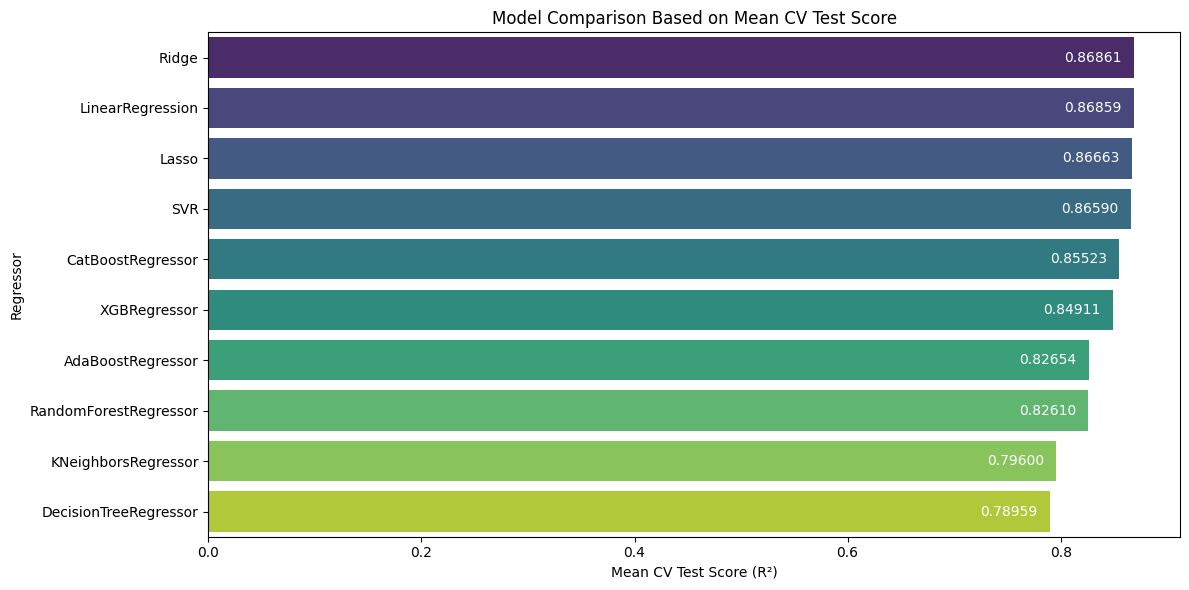

In [61]:
# Add model names to results
results_df['model_name'] = results_df['param_clf'].apply(lambda x: type(x).__name__)

# Group by model and get the best score per model
model_scores = results_df.groupby('model_name')['mean_test_score'].max().reset_index()
model_scores = model_scores.sort_values(by='mean_test_score', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=model_scores, x='mean_test_score', y='model_name', hue= 'model_name',palette= 'viridis')

plt.xlabel('Mean CV Test Score (R²)')
plt.ylabel('Regressor')
plt.title('Model Comparison Based on Mean CV Test Score')
plt.grid(False)
plt.tight_layout()

for container in bar_plot.containers:
    plt.bar_label(container, fmt = "%.5f", padding= -50, color = 'white')

plt.show()


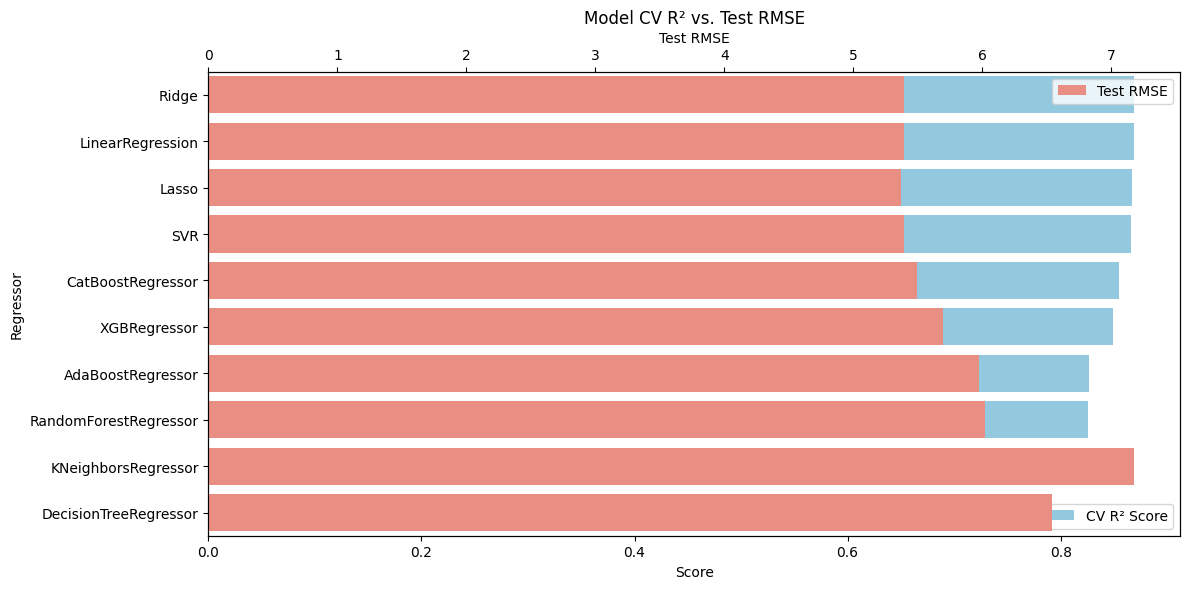

In [62]:
# Step 1: Initialize a list to collect test-set RMSE per model
from sklearn.metrics import mean_squared_error
import numpy as np

test_rmse = []

# Step 2: Loop through best hyperparams for each model and compute test RMSE
for model_name in results_df['model_name'].unique():
    # Filter only rows for this model
    model_df = results_df[results_df['model_name'] == model_name]
    
    # Get best params for this model
    best_index = model_df['mean_test_score'].idxmax()
    best_params = model_df.loc[best_index, 'params']
    
    # Rebuild pipeline with best params
    pipe.set_params(**best_params)
    pipe.fit(X_train, y_train)
    
    # Predict on test set and calculate RMSE
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    test_rmse.append((model_name, rmse))

# Step 3: Create a new DataFrame
rmse_df = pd.DataFrame(test_rmse, columns=['model_name', 'test_rmse'])

# Step 4: Merge with model_scores from earlier
plot_df = model_scores.merge(rmse_df, on='model_name')

# Step 5: Plot both CV Score and Test RMSE
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for CV score (R²)
sns.barplot(data=plot_df, x='mean_test_score', y='model_name', color='skyblue', ax=ax1, label='CV R² Score')
ax1.set_xlabel('Score')
ax1.set_ylabel('Regressor')
ax1.set_title('Model CV R² vs. Test RMSE')
ax1.legend(loc='lower right')

# Create a second y-axis for RMSE
ax2 = ax1.twiny()
sns.barplot(data=plot_df, x='test_rmse', y='model_name', color='salmon', ax=ax2, label='Test RMSE')
ax2.set_xlabel('Test RMSE')

plt.tight_layout()
plt.show()
